/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Total power generation (Solar generator):
1836.002296887895
Total power generation (Wind generator):
9887.615407991945
Total power generation (Neural network-based system):
14500.0


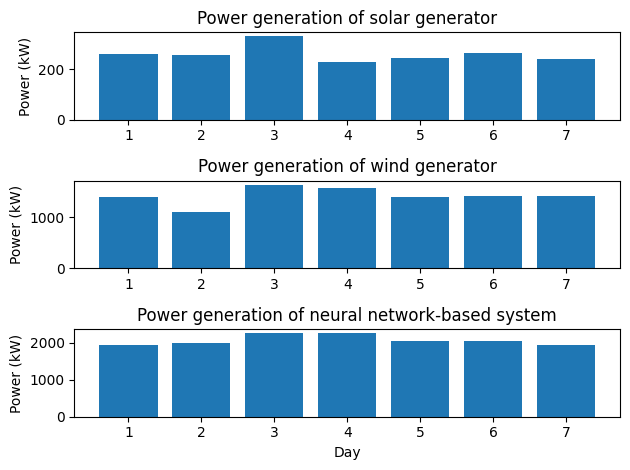

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Function to calculate diesel generator power
def calculate_diesel_generator_power(fuel_level, rated_power, efficiency, fuel_consumption_rate):
    power = min(fuel_level * efficiency, rated_power)
    fuel_consumption = power / efficiency * fuel_consumption_rate
    return power, fuel_consumption

# Function to calculate solar panel power
def calculate_solar_panel_power(solar_irradiance, rated_power, efficiency, area):
    power = solar_irradiance * area * efficiency / 1000  # Convert power from watts to kilowatts
    fuel_consumption = 0  # Solar panel does not consume fuel
    return power, fuel_consumption

# Function to calculate wind turbine power
def calculate_wind_turbine_power(wind_speed, rated_power, cut_in_wind_speed, rated_wind_speed, cut_out_wind_speed):
    power = np.zeros_like(wind_speed)
    fuel_consumption = np.zeros_like(wind_speed)

    # Calculate power for each wind speed value
    mask = (wind_speed >= cut_in_wind_speed) & (wind_speed < rated_wind_speed)
    power[mask] = ((wind_speed[mask] - cut_in_wind_speed) /
                   (rated_wind_speed - cut_in_wind_speed)) * rated_power

    mask = (wind_speed >= rated_wind_speed) & (wind_speed < cut_out_wind_speed)
    power[mask] = rated_power

    # Wind turbine does not consume fuel, so fuel consumption remains zero
    return power, fuel_consumption

# Parameters for the solar generator
solar_panel_rated_power = 50
solar_panel_efficiency = 0.15
solar_panel_area = 100

# Parameters for the wind generator
wind_turbine_rated_power = 100
wind_turbine_cut_in_wind_speed = 3
wind_turbine_rated_wind_speed = 12
wind_turbine_cut_out_wind_speed = 25

# Generate random weather conditions for two weeks
n_conditions = 7 * 24 * 2  # 2 weeks with hourly intervals
wind_speed = np.random.rand(n_conditions) * 30
solar_irradiance = np.random.rand(n_conditions) * 1500

# Calculate power generation for the solar generator for one week
solar_generator_power_week = np.zeros(7)
for i in range(7):
    day_start = i * 24
    day_end = (i + 1) * 24
    day_irradiance = solar_irradiance[day_start:day_end]
    solar_power, _ = calculate_solar_panel_power(day_irradiance, solar_panel_rated_power, solar_panel_efficiency, solar_panel_area)
    solar_generator_power_week[i] = np.sum(solar_power)

# Calculate power generation for the wind generator for one week
wind_generator_power_week = np.zeros(7)
for i in range(7):
    day_start = i * 24
    day_end = (i + 1) * 24
    day_wind_speed = wind_speed[day_start:day_end]
    wind_power, _ = calculate_wind_turbine_power(day_wind_speed, wind_turbine_rated_power, wind_turbine_cut_in_wind_speed, wind_turbine_rated_wind_speed, wind_turbine_cut_out_wind_speed)
    wind_generator_power_week[i] = np.sum(wind_power)

# Neural network-based generator selection system
net = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', solver='adam', max_iter=500)

# Create expected output based on weather conditions
expected_output = np.zeros((n_conditions, 2))
for i in range(n_conditions):
    if wind_speed[i] > 10:
        expected_output[i] = [1, 0]  # Wind generator selected
    else:
        expected_output[i] = [0, 1]  # Solar generator selected

# Train the neural network
inputs = np.vstack((wind_speed, solar_irradiance)).T
targets = expected_output
net.fit(inputs, targets)

# Calculate power generation for the neural network-based system for one week
nn_generator_power_week = np.zeros(7)
for i in range(7):
    day_start = i * 24
    day_end = (i + 1) * 24
    day_inputs = np.vstack((wind_speed[day_start:day_end], solar_irradiance[day_start:day_end])).T
    day_output = net.predict(day_inputs)
    nn_generator_power_week[i] = np.sum(day_output[:, 0] * wind_turbine_rated_power + day_output[:, 1] * solar_panel_rated_power)

# Output total power generation for each system
print("Total power generation (Solar generator):")
print(np.sum(solar_generator_power_week))
print("Total power generation (Wind generator):")
print(np.sum(wind_generator_power_week))
print("Total power generation (Neural network-based system):")
print(np.sum(nn_generator_power_week))

# Visualize power generation for each week and each day
plt.figure()
plt.subplot(3, 1, 1)
plt.bar(range(1, 8), solar_generator_power_week)
plt.ylabel('Power (kW)')
plt.title('Power generation of solar generator')

plt.subplot(3, 1, 2)
plt.bar(range(1, 8), wind_generator_power_week)
plt.ylabel('Power (kW)')
plt.title('Power generation of wind generator')

plt.subplot(3, 1, 3)
plt.bar(range(1, 8), nn_generator_power_week)
plt.ylabel('Power (kW)')
plt.xlabel('Day')
plt.title('Power generation of neural network-based system')

plt.tight_layout()
plt.show()
